# Simple Example
With tributary we can easily construct a forward-propagating reactive graph

In [1]:
import tributary.streaming as ts
import random, time

In [2]:
def foo():
    return random.random()

def long():
    print('long called!')
    time.sleep(1)
    return 5


# A timer calls the given function every interval up to count times
test = ts.Timer(foo, {}, interval=.5, count=5)

test2 = ts.Negate(test)

res2 = test + test2

p2 = ts.Print(res2)

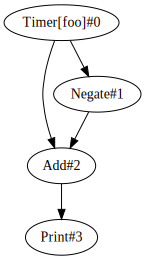

In [3]:
ts.GraphViz(p2)

In [4]:
x = ts.run(p2)

0.0
0.0
0.0
0.0
0.0


In [5]:
x.result()

[0.0, 0.0, 0.0, 0.0, 0.0]

# More Complex Example
Let's construct a slightly more complex graph

In [6]:
import asyncio

def foo():
    return random.random()

async def long():
    await asyncio.sleep(1)
    return 5
    
rand = ts.Timer(foo, interval=0, count=5)
five = ts.Timer(long, interval=0, count=5)
one = ts.Const(1)
five2 = ts.Const(5)
neg_rand = ts.Negate(rand)


x1 = rand + five # 5 + rand
x2 = x1 - five2 # rand
x3 = x2 + neg_rand # 0
res = x3 + one # 1

p = ts.Print(res)


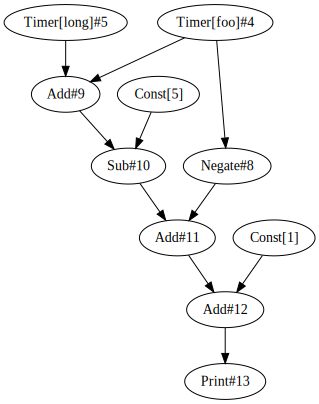

In [7]:
p.graphviz()

In [8]:
x = ts.run(p)

1.0000000000000004
0.9999999999999999
1.0000000000000004
1.0
1.0


In [9]:
x.result()

[1.0000000000000004, 0.9999999999999999, 1.0000000000000004, 1.0, 1.0]

# Rolling Mean

In [10]:
def stream():
    for _ in range(10):
        yield _

f = ts.Foo(stream)
s = f.rollingSum()
c = f.rollingCount()
f3 = ts.Div(s, c)
p = ts.Print(f3)



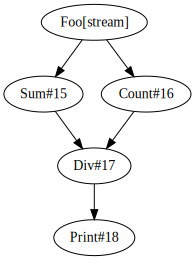

In [11]:
p.graphviz()

In [12]:
x = ts.run(p)

0.0
0.5
1.0
1.5
2.0
2.5
3.0
3.5
4.0
4.5


In [13]:
x.result()

[0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5]

# Custom Calculations and Window Functions


In [5]:
def myfoo(ds):
    for d in ds:
        vals = d.values()
        d['HIGH'] = max(vals)
        d['LOW'] = min(vals)
        d['MID'] = sum(vals)/len(vals)
    avgs = [x['MID'] for x in ds]
    ds[-1]['SMA'] = sum(avgs)/len(avgs)
    return [ds[-1]]

In [6]:
vals = ts.Random(100)
w = ts.Window(vals, size=5)
n = ts.Apply(w, myfoo)
psp1 = ts.Perspective(n, schema={'HIGH': float, 'LOW': float, 'MID': float, 'SMA': float}, plugin='y_line')
x = ts.run(ts.Perspective(psp1, schema={'HIGH': float, 'LOW': float, 'MID': float, 'SMA': float}))

PerspectiveWidget(columns=['HIGH', 'LOW', 'MID', 'SMA'], plugin='y_line')

PerspectiveWidget(columns=['HIGH', 'LOW', 'MID', 'SMA'])